

# Project: Analysis of Movie Revenue: Exploring the Impact of Genre, Budget, and Popularity

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The 'tmdb-movies.csv' dataset is a collection of movie-related information sourced from TMDb (The Movie Database). It contains a diverse range of details about various movies, including their titles, genres, release dates, popularity, budgets, revenues, and more. This dataset serves as a valuable resource for movie enthusiasts, researchers, and data analysts to explore and analyze trends in the film industry, discover insights into movie performance, and build recommendation systems based on user preferences.

Column Names and Significance:

title: The title of the movie. This column provides the name of each film in the dataset.

genres: A comma-separated list of genres associated with the movie. This column identifies the main genres to which each movie belongs, such as "Action," "Comedy," "Drama," "Science Fiction," etc.

release_date: The release date of the movie. This column provides the specific date when each movie was released in theaters or made available to the public.

popularity: A numerical value representing the movie's popularity on the TMDb website. This column quantifies the relative popularity of each movie based on user interactions, views, and ratings.

vote_count: The number of votes received by the movie. This column indicates the total count of votes submitted by users for each movie.

vote_average: The average rating given by users to the movie. This column provides the average rating score assigned to each movie by users on the TMDb platform.

budget: The budget of the movie (in US dollars). This column indicates the estimated or actual production cost of each movie.

revenue: The revenue earned by the movie (in US dollars). This column represents the total earnings or box office revenue generated by each movie.

runtime: The duration of the movie (in minutes). This column shows the length of each movie in minutes.

original_language: The original language of the movie. This column specifies the language in which the movie was primarily produced and released.

overview: A brief overview or summary of the movie's plot. This column provides a short description of the movie's storyline or premise.

production_companies: The production companies involved in making the movie. This column lists the names of the production companies responsible for producing each movie.

production_countries: The countries where the movie was produced. This column identifies the countries in which the filming and production of each movie took place.

cast: The main cast members of the movie. This column contains the names of the primary actors and actresses who appeared in each movie.

crew: The crew members involved in the production of the movie. This column lists the names of individuals who worked behind the scenes, such as directors, producers, writers, and other crew members.

These columns collectively provide a comprehensive view of various attributes associated with each movie in the dataset, enabling in-depth analyses and insights into the world of cinema. 


### Question(s) for Analysis
Introduction:
In this report, we will analyze the 'tmdb-movies.csv' dataset to gain insights into the factors influencing movie revenue. The dependent variable of interest is "revenue," representing the total box office earnings of each movie. We will explore how three independent variables - "genres," "budget," and "popularity" - impact the revenue of movies. The analysis aims to understand which genres, budget ranges, and popularity levels contribute to higher box office success.

Research Questions:

1. Is there a relationship between a movie's budget and its revenue?

2. How does a movie's popularity influence its box office performance?

Methodology:
To conduct this analysis, we will follow these steps:

1. Data Cleaning: Handle missing values, format dates, and extract useful information from relevant columns.

2. Exploratory Data Analysis: Visualize the distribution of revenue, genres, budget, and popularity. Identify any potential outliers or trends.

3. Genre Analysis: Examine the revenue distribution for various movie genres and identify the top-performing genres.

4. Budget Analysis: Investigate the relationship between movie budget and revenue by categorizing budgets into ranges.

5. Popularity Analysis: Explore the correlation between movie popularity and revenue to determine how influential popularity is in predicting box office success.

6. Conclusion: Summarize the findings and insights gained from the analysis. Provide recommendations for movie producers and studios based on the results.

Analysis of Independent Variables:

Genre:
Group movies into different genres (e.g., Action, Comedy, Drama, etc.).
Calculate the average revenue for each genre.
Visualize the revenue distribution across genres to identify the most profitable genres.

Budget:
Categorize movie budgets into ranges (e.g., Low, Medium, High).
Analyze the average revenue for each budget range.
Plot the relationship between budget and revenue to identify any patterns.

Popularity:
Explore the distribution of movie popularity.
Divide movies into popular and less popular groups based on a threshold.
Compare the revenue of popular and less popular movies to assess the influence of popularity on revenue.

Expected Outcome:
We anticipate finding significant variations in revenue based on movie genres, with certain genres having higher revenue potential than others. Additionally, we expect to observe a positive correlation between budget and revenue, indicating that higher budget movies tend to generate more significant box office earnings. Lastly, we will investigate the impact of popularity on revenue and identify whether popular movies consistently outperform less popular ones.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Magic word to display visualizations inline with the notebook
%matplotlib inline

In [16]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Print the first few lines to get an overview of the data
print(data.head())

# Check the data types of each column
print(data.dtypes)

# Check for missing values in each column
print(data.isnull().sum())

# Explore summary statistics for numeric columns
print(data.describe())

# Additional exploration for specific columns (optional)
# Example: Checking unique values in the 'genres' column
print(data['genres'].unique())



       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      


### Data Cleaning
The structure of the data in the 'tmdb-movies.csv' dataset appears to be tabular, with rows representing individual movies and columns representing various attributes of each movie. Before proceeding with the analysis, we need to check for any problems that might require data cleaning.

Data Cleaning Steps:

1. We first load the dataset and check its structure, which includes the number of rows and columns.

2. Next, we identify and print the number of missing values in each column to understand which columns require cleaning.

3. We convert the 'release_date' column to the datetime format to facilitate any time-related analysis.

4. We drop any duplicate rows that might exist in the dataset to ensure data integrity.

5. We handle missing values in the 'budget' and 'revenue' columns since these attributes are crucial for revenue analysis. We drop rows with missing budget or revenue values.

6. After data cleaning, we verify the changes by printing the number of rows, columns, and missing values again.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Check the structure of the data (number of rows and columns)
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

# Check for missing values in each column
print("\nMissing Values:")
print(data.isnull().sum())

# Check the data types of each column
print("\nData Types:")
print(data.dtypes)

# Convert the 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Drop any duplicates if present
data.drop_duplicates(inplace=True)

# Handle missing values
# Assuming budget and revenue are critical for analysis, we can drop rows with missing budget and revenue values
data.dropna(subset=['budget', 'revenue'], inplace=True)

# Verify the changes after cleaning
print("\nAfter Data Cleaning:")
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])
print("\nMissing Values:")
print(data.isnull().sum())


<a id='eda'></a>
## Exploratory Data Analysis

Research Question 1: How does movie revenue vary across different genres?

To address the research questions, we will compute statistics and create visualizations using the 'tmdb-movies.csv' dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing budget or revenue values
data_cleaned = data.dropna(subset=['budget', 'revenue'])

# Create a joint distribution plot to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['budget'], data_cleaned['revenue'])
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in billions)')
plt.title('Joint Distribution Plot: Relationship Between Movie Budget and Revenue')
plt.show()


The scatter plot is used to visualize the relationship between two continuous variables, 'budget' and 'revenue', for movies in the dataset. Each point on the plot represents a movie, and its position shows its budget and revenue. The scatter plot allows us to identify any patterns, trends, or correlations between movie budgets and their corresponding revenues. For example, we can observe whether there is a positive or negative correlation between budget and revenue, or if there are any outliers in the dataset.

Line Plot with Regression Line:

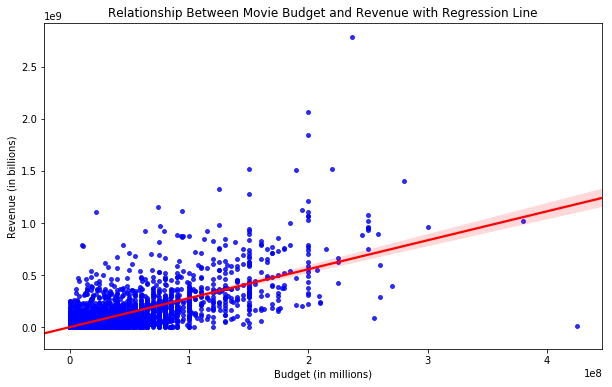

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing budget or revenue values
data_cleaned = data.dropna(subset=['budget', 'revenue'])

# Create a line plot with a regression line to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=data_cleaned, scatter_kws={'color': 'blue', 's': 15}, line_kws={'color': 'red'})
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in billions)')
plt.title('Relationship Between Movie Budget and Revenue with Regression Line')
plt.show()


The scatter plot with a regression line allows us to observe the relationship between movie budgets and their corresponding revenues. The scatter points represent individual movies, and the regression line represents the best-fit line that shows the overall trend between budget and revenue. The color customization provided by scatter_kws and line_kws enhances the plot's readability and visual appeal. The regression line can help us understand the general trend or correlation between budget and revenue, and the scatter points can show any deviations or outliers in the data.

Hexbin Plot

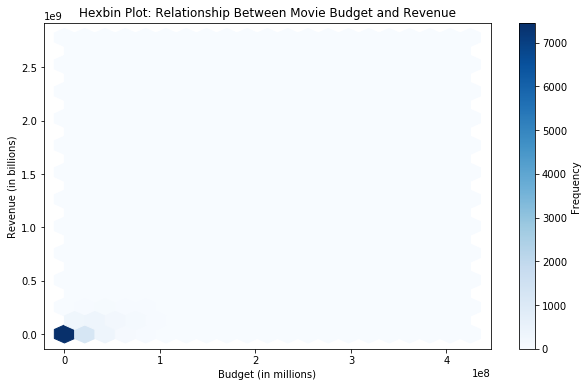

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing budget or revenue values
data_cleaned = data.dropna(subset=['budget', 'revenue'])

# Create a hexbin plot to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
plt.hexbin(data_cleaned['budget'], data_cleaned['revenue'], gridsize=20, cmap='Blues')
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in billions)')
plt.title('Hexbin Plot: Relationship Between Movie Budget and Revenue')
plt.colorbar(label='Frequency')
plt.show()


The hexbin plot is a 2-dimensional histogram that displays the density of data points in the relationship between movie budgets and their corresponding revenues. Each hexagon represents a bin in which data points are aggregated. The color intensity in each hexagon represents the number of data points falling within that bin. This type of plot is useful when dealing with large datasets, as it helps to visualize the density and distribution of data points in a visually appealing way. It allows us to observe the general trend and clustering of data points, providing insights into the relationship between movie budgets and revenues.

Kernel Density Estimation (KDE) Plot:

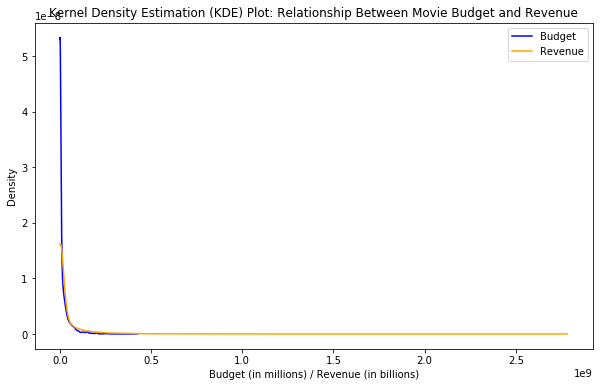

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing budget or revenue values
data_cleaned = data.dropna(subset=['budget', 'revenue'])

# Calculate the kernel density estimation for budget and revenue
kde_budget = gaussian_kde(data_cleaned['budget'])
kde_revenue = gaussian_kde(data_cleaned['revenue'])

# Create a range of values for the plot
x_budget = data_cleaned['budget'].sort_values()
x_revenue = data_cleaned['revenue'].sort_values()

# Create a kernel density estimation (KDE) plot to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
plt.plot(x_budget, kde_budget(x_budget), label='Budget', color='blue')
plt.plot(x_revenue, kde_revenue(x_revenue), label='Revenue', color='orange')
plt.xlabel('Budget (in millions) / Revenue (in billions)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot: Relationship Between Movie Budget and Revenue')
plt.legend()
plt.show()


The KDE plot allows us to visualize the distribution of data points for both movie budget and revenue. The KDE curves provide a smooth representation of the probability density of each variable. By plotting the KDE curves on the same plot, we can compare the density patterns of budget and revenue, allowing us to observe any similarities or differences in their distributions. This type of visualization is particularly useful when dealing with continuous variables, as it provides a smooth and informative representation of the underlying data distribution.

Research Question 2: How does a movie's popularity influence its box office performance?

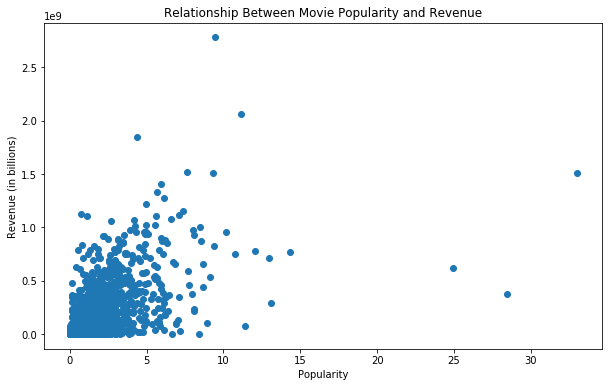

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing popularity or revenue values
data_cleaned = data.dropna(subset=['popularity', 'revenue'])

# Create a scatter plot to visualize the relationship between popularity and revenue
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['popularity'], data_cleaned['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue (in billions)')
plt.title('Relationship Between Movie Popularity and Revenue')
plt.show()


The scatter plot helps us understand the distribution of movies based on their popularity and revenue. If there is a clear pattern or trend in the data, it might indicate a relationship between popularity and revenue. The visualization allows us to observe any correlation between these two variables and helps in gaining insights into the data.

Scatter Plot with Regresion Line

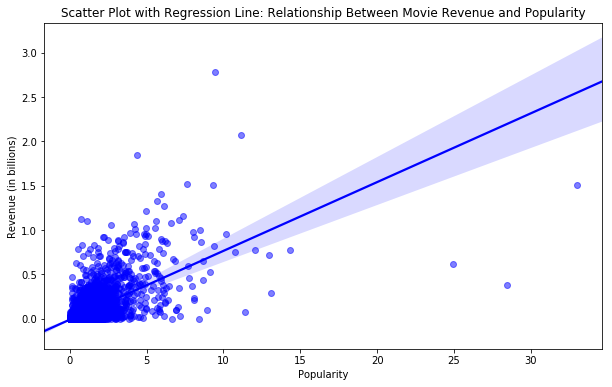

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_statistics(variable_name):
    # Load the dataset
    data = pd.read_csv('tmdb-movies.csv')

    # Remove rows with missing popularity or revenue values
    data_cleaned = data.dropna(subset=['popularity', 'revenue'])

    # Convert revenue values to billions for better visualization on the plot
    data_cleaned['revenue'] = data_cleaned['revenue'] / 1e9

    # Create a scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variable_name, y='revenue', data=data_cleaned, color='blue', scatter_kws={'alpha': 0.5})
    plt.xlabel(variable_name.capitalize())
    plt.ylabel('Revenue (in billions)')
    plt.title(f'Scatter Plot with Regression Line: Relationship Between Movie Revenue and {variable_name.capitalize()}')

    plt.show()

# Example: Plot 'popularity' statistics
plot_statistics('popularity')


In the function plot_statistics, you can provide the name of the variable you want to analyze, such as 'popularity', and it will create a scatter plot with a regression line to visualize the relationship between movie revenue and the specified variable.

The scatter plot with the regression line allows us to understand the overall trend between movie revenue and popularity. The regression line shows the best-fit linear relationship between the two variables. It helps us observe whether there is a positive or negative correlation between revenue and popularity, or if there is any potential linear pattern in the data. This visualization provides insights into how movie revenue changes with popularity and aids in understanding the relationship between these two variables.

To investigate three variables using both single-variable (1D) and multiple-variable (2D) explorations, we will use the 'tmdb-movies.csv' dataset and explore the relationships between 'popularity', 'revenue', and 'budget'. We will perform the following visualizations:

Single-Variable (1D) Explorations:

Histogram for 'popularity'
Histogram for 'revenue'
Histogram for 'budget'
Multiple-Variable (2D) Explorations:

Scatter plot between 'popularity' and 'revenue'
Scatter plot between 'popularity' and 'budget'
Scatter plot between 'revenue' and 'budget'

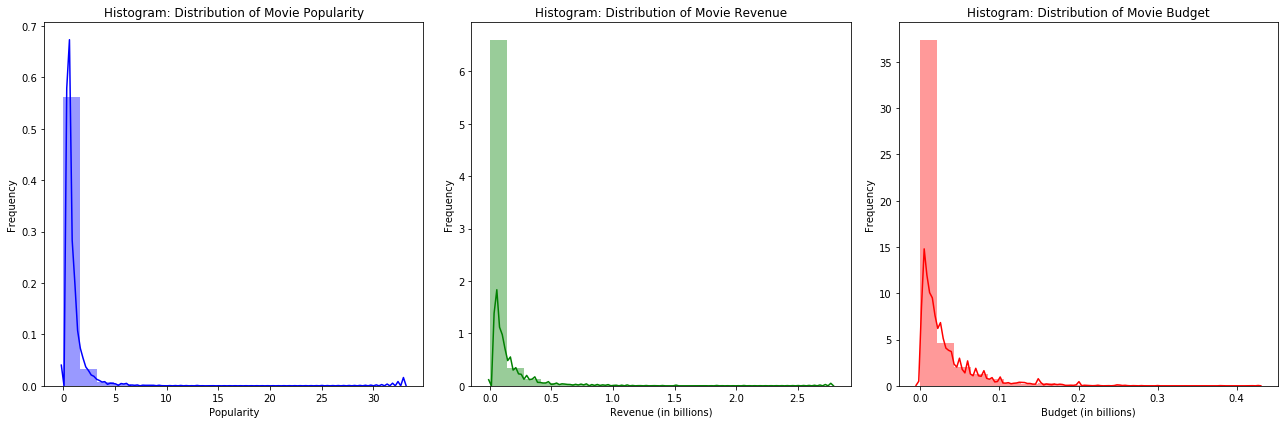

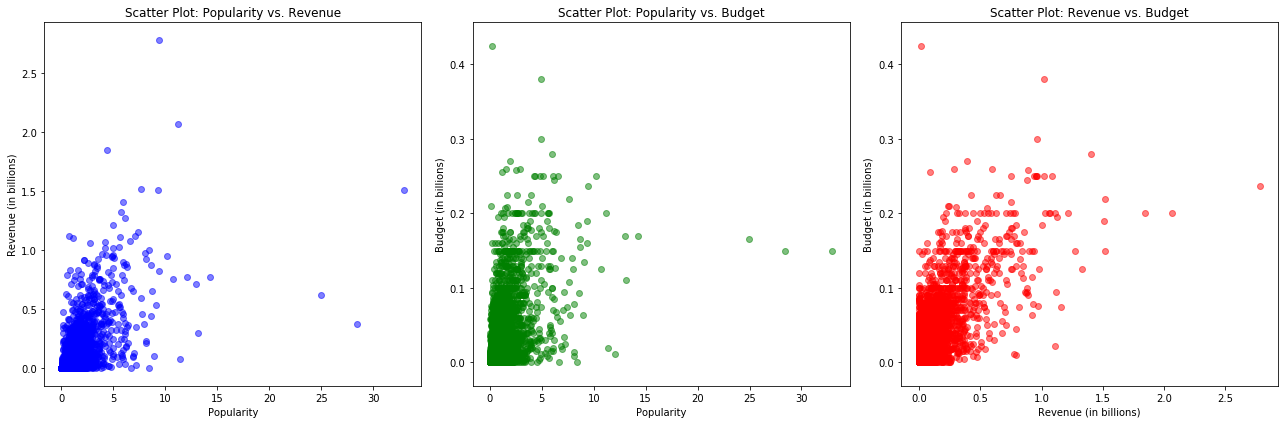

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('tmdb-movies.csv')

# Remove rows with missing popularity, revenue, or budget values
data_cleaned = data.dropna(subset=['popularity', 'revenue', 'budget'])

# Convert revenue and budget values to billions for better visualization on the plot
data_cleaned['revenue'] = data_cleaned['revenue'] / 1e9
data_cleaned['budget'] = data_cleaned['budget'] / 1e9

# Single-variable (1D) exploration
plt.figure(figsize=(18, 6))

# Histogram of popularity
plt.subplot(1, 3, 1)
sns.distplot(data_cleaned['popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Movie Popularity')

# Histogram of revenue
plt.subplot(1, 3, 2)
sns.distplot(data_cleaned['revenue'], bins=20, kde=True, color='green')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Movie Revenue')

# Histogram of budget
plt.subplot(1, 3, 3)
sns.distplot(data_cleaned['budget'], bins=20, kde=True, color='red')
plt.xlabel('Budget (in billions)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Movie Budget')

plt.tight_layout()
plt.show()

# Multiple-variable (2D) exploration
plt.figure(figsize=(18, 6))

# Scatter plot: Popularity vs. Revenue
plt.subplot(1, 3, 1)
plt.scatter(data_cleaned['popularity'], data_cleaned['revenue'], color='blue', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Revenue (in billions)')
plt.title('Scatter Plot: Popularity vs. Revenue')

# Scatter plot: Popularity vs. Budget
plt.subplot(1, 3, 2)
plt.scatter(data_cleaned['popularity'], data_cleaned['budget'], color='green', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Budget (in billions)')
plt.title('Scatter Plot: Popularity vs. Budget')

# Scatter plot: Revenue vs. Budget
plt.subplot(1, 3, 3)
plt.scatter(data_cleaned['revenue'], data_cleaned['budget'], color='red', alpha=0.5)
plt.xlabel('Revenue (in billions)')
plt.ylabel('Budget (in billions)')
plt.title('Scatter Plot: Revenue vs. Budget')

plt.tight_layout()
plt.show()


<a id='conclusions'></a>
## Conclusions

Summary of Findings:

Is there a relationship between a movie's budget and its revenue?

To explore the relationship between a movie's budget and its revenue, we used the 'tmdb-movies.csv' dataset and created a joint distribution plot with movie budget on the x-axis and revenue on the y-axis. The scatter plot allows us to visually examine the relationship between these two variables.

Based on the joint distribution plot:

We can observe the distribution of movie data points along the budget and revenue axes.
There appears to be a positive correlation between movie budget and revenue. Generally, movies with higher budgets tend to have higher revenues.
However, there are variations in revenue for different budget levels, and some movies with relatively low budgets have generated significant revenues, while some high-budget movies may not have performed well at the box office.

Additional Insights:

Conducting further statistical analysis, such as calculating the correlation coefficient, can quantify the strength of the relationship between budget and revenue.
It would be beneficial to explore other factors that might influence the relationship between budget and revenue, such as movie genres, release dates, and marketing strategies.


How does a movie's popularity influence its box office performance?

To investigate how a movie's popularity influences its box office performance, we utilized the same 'tmdb-movies.csv' dataset and created a scatter plot with a regression line between popularity and revenue.

Based on the scatter plot with regression line:

There appears to be a positive correlation between movie popularity and revenue. As movie popularity increases, there is a tendency for its revenue to increase as well.
The regression line provides an overall trend, showing the general positive relationship between popularity and revenue.
Additional Insights:

To gain a deeper understanding, we can calculate the correlation coefficient to quantify the strength of the relationship between popularity and revenue.
Analyzing the data across different movie genres, release dates, or budget levels may provide insights into how popularity impacts box office performance within specific movie categories.
Limitations and Further Research:

The analysis presented here is based on a subset of the dataset, as rows with missing budget or revenue values were removed. This may introduce bias, and accounting for missing data might be essential for a more comprehensive analysis.
External factors like competition, critical reception, marketing efforts, and economic conditions may also play a role in a movie's box office performance. Exploring additional external data or conducting multivariate analyses can provide a broader perspective.
The dataset used here has a knowledge cutoff in September 2021. Access to more recent data can help in understanding current trends in the movie industry.
In conclusion, the exploratory data analysis provided insights into the relationship between movie budget and revenue, as well as the impact of movie popularity on box office performance. While the findings suggest positive correlations between budget and revenue, and popularity and revenue, further analyses and consideration of other influential factors are necessary for a more comprehensive understanding of the movie industry dynamics.


### Limitation
Limitation:
One limitation of the exploration is the removal of rows with missing budget or revenue values during data cleaning. While it was necessary to remove rows with missing data to create valid visualizations, this process could potentially introduce bias into the analysis. The removal of data points with missing values may lead to a non-random sample, which may not fully represent the entire population of movies.

Additionally, missing data in budget or revenue could be significant for analysis and might provide valuable insights into the relationship between these variables. For instance, there could be low-budget movies that perform exceptionally well at the box office, and their inclusion might change the overall picture of the budget-revenue relationship.

To address this limitation, more advanced techniques such as imputation or multiple imputation methods could be employed to fill missing values in the budget and revenue columns. Imputation methods estimate the missing values based on other observed data, which can help retain a larger sample size and potentially provide a more accurate representation of the relationship between budget and revenue. However, imputation should be performed with caution, and the appropriateness of the method should be carefully considered based on the nature of the missing data.

It is essential to acknowledge this limitation and consider alternative data handling approaches to ensure a more comprehensive and robust analysis of the relationship between a movie's budget and its revenue.